<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-Calculated-Risk-and-Confirmed-Cases-Data" data-toc-modified-id="Read-in-Calculated-Risk-and-Confirmed-Cases-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Calculated Risk and Confirmed Cases Data</a></span></li><li><span><a href="#Merge-with-Hospital-data" data-toc-modified-id="Merge-with-Hospital-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Merge with Hospital data</a></span></li><li><span><a href="#Merge-with-Death-Recover-Data" data-toc-modified-id="Merge-with-Death-Recover-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge with Death Recover Data</a></span></li><li><span><a href="#Merge-with-Population-Density" data-toc-modified-id="Merge-with-Population-Density-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Merge with Population Density</a></span></li></ul></div>

This notebook takes in the calculated risk and confirmed cases data and outputs the final full dataset we are going to use in modeling by merging with data of death cases and recover cases, hospital data, and population density data.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime  
from datetime import timedelta

## Read in Calculated Risk and Confirmed Cases Data

In [2]:
confirmed_cases = pd.read_csv('data/riskCalculated_confirmed_cases_moving_average_v0517_v2.csv').drop(columns=['Unnamed: 0'])
confirmed_cases['date'] = pd.to_datetime(confirmed_cases['date'])

In [3]:
confirmed_cases[confirmed_cases.FIPS == 36001][50:60]

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted
3922,36001.0,2020-04-28,1009,1010,264.170544,6.721038,0.021602,0.140355,0.031857,0.204792
4004,36001.0,2020-04-29,1067,1068,264.784188,6.725329,0.022086,0.143325,0.032654,0.209780
4086,36001.0,2020-04-30,1165,1166,265.386388,6.729436,0.023218,0.150460,0.034440,0.221133
4168,36001.0,2020-05-01,1204,1205,265.980007,6.733405,0.026854,0.173138,0.040080,0.256403
4250,36001.0,2020-05-02,1238,1239,266.567025,6.737268,0.027232,0.175122,0.040667,0.259643
4332,36001.0,2020-05-03,1258,1259,179.469543,4.512530,0.025303,0.163197,0.025063,0.160642
4411,36001.0,2020-05-04,1287,1288,567.283835,14.243786,0.009350,0.060071,0.073457,0.469019
4489,36001.0,2020-05-05,1294,1295,535.028683,13.311368,0.009500,0.060984,0.069894,0.446123
4567,36001.0,2020-05-06,1321,1322,502.776942,12.379049,0.009375,0.060144,0.064369,0.410618
4645,36001.0,2020-05-07,1348,1349,470.527683,11.446803,0.009385,0.060023,0.059917,0.381004


In [4]:
confirmed_cases_dropna = confirmed_cases.dropna()
confirmed_cases_change_type = confirmed_cases_dropna.astype({'FIPS':np.int64})

In [5]:
confirmed_cases_change_type.head(10)

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted
474,25003,2020-03-15,9,10,5.000000,0.147059,0.000000,0.000000,0.000000,0.000000
475,29095,2020-03-15,0,1,106.000000,0.690109,0.000000,0.000000,0.000000,0.000000
476,29183,2020-03-15,0,1,16.666667,0.072901,0.000000,0.000000,0.000000,0.000000
477,34003,2020-03-15,25,26,934.500000,9.563811,0.001301,0.010791,0.001301,0.010791
478,34013,2020-03-15,7,8,329.500000,3.033359,0.000208,0.001816,0.000208,0.001816
479,34017,2020-03-15,5,6,229.600000,2.211715,0.000101,0.000965,0.000101,0.000965
480,34019,2020-03-15,1,2,137.000000,1.464251,0.000000,0.000000,0.000000,0.000000
481,34023,2020-03-15,10,11,436.000000,4.016488,0.000533,0.004206,0.000533,0.004206
482,34025,2020-03-15,8,9,1046.000000,10.476015,0.001219,0.008759,0.001219,0.008759
483,34027,2020-03-15,3,4,283.000000,2.668677,0.000064,0.000447,0.000064,0.000447


In [6]:
#confirmed_cases_change_type['cum_confirmed'] = confirmed_cases_change_type.groupby(['FIPS','County','State']).confirmed.cumsum()
#confirmed_cases_change_type.head(11)

In [7]:
confirmed_cases_final = confirmed_cases_change_type.copy()

In [8]:
confirmed_cases_final.columns

Index(['FIPS', 'date', 'confirmed_cases', 'confirmed_cases_smooth',
       'num_visits_movavg_14', 'num_visitors_nmlz_movavg_14', 'risk',
       'risk_density_weighted', 'risk_moving_avg',
       'risk_moving_avg_density_weighted'],
      dtype='object')

In [9]:
confirmed_cases_final.head()

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted
474,25003,2020-03-15,9,10,5.000000,0.147059,0.000000,0.000000,0.000000,0.000000
475,29095,2020-03-15,0,1,106.000000,0.690109,0.000000,0.000000,0.000000,0.000000
476,29183,2020-03-15,0,1,16.666667,0.072901,0.000000,0.000000,0.000000,0.000000
477,34003,2020-03-15,25,26,934.500000,9.563811,0.001301,0.010791,0.001301,0.010791
478,34013,2020-03-15,7,8,329.500000,3.033359,0.000208,0.001816,0.000208,0.001816


In [10]:
confirmed_cases_final[confirmed_cases_final.FIPS ==36031]

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted
505,36031,2020-03-15,0,1,134.125000,2.531698,0.000019,0.000144,0.000019,0.000144
583,36031,2020-03-16,0,1,325.625000,6.551324,0.000000,0.000000,0.000000,0.000000
661,36031,2020-03-17,1,2,322.222222,6.538034,0.000000,0.000000,0.000000,0.000000
739,36031,2020-03-18,1,2,319.500000,6.527403,0.000194,0.000588,0.000319,0.000963
817,36031,2020-03-19,1,2,317.272727,6.518704,0.000196,0.000600,0.000323,0.000982
895,36031,2020-03-20,1,2,315.416667,6.511455,0.000196,0.000600,0.000323,0.000982
973,36031,2020-03-21,2,3,313.846154,6.505321,0.000204,0.000636,0.000323,0.000982
1051,36031,2020-03-22,3,4,189.500000,3.946004,0.000613,0.001926,0.000610,0.001918
1128,36031,2020-03-23,3,4,447.678571,9.341447,0.002005,0.006063,0.002814,0.008507
1205,36031,2020-03-24,3,4,429.607143,9.113353,0.002005,0.006063,0.002753,0.008324


## Merge with Hospital data

In [11]:
hospital = pd.read_csv('data/hospital.csv').drop(columns = ['Unnamed: 0'])
hospital.head()

,COUNTY,STATE,COUNTYFIPS,num_hospital,num_beds
0,ABBEVILLE,SC,45001,1,25
1,ACADIA,LA,22001,6,-2938
2,ADA,ID,16001,11,-1643
3,ADAIR,IA,19001,1,25
4,ADAIR,KY,21001,1,77


In [12]:
hospital.COUNTYFIPS[hospital.COUNTYFIPS == 'NOT AVAILABLE'] = np.nan

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
hospital.head()

,COUNTY,STATE,COUNTYFIPS,num_hospital,num_beds
0,ABBEVILLE,SC,45001,1,25
1,ACADIA,LA,22001,6,-2938
2,ADA,ID,16001,11,-1643
3,ADAIR,IA,19001,1,25
4,ADAIR,KY,21001,1,77


In [14]:
hospital_dropna = hospital.dropna()

In [15]:
hospital_change_type = hospital_dropna.astype({'COUNTYFIPS':np.int64})

In [16]:
hospital_change_type.head()

,COUNTY,STATE,COUNTYFIPS,num_hospital,num_beds
0,ABBEVILLE,SC,45001,1,25
1,ACADIA,LA,22001,6,-2938
2,ADA,ID,16001,11,-1643
3,ADAIR,IA,19001,1,25
4,ADAIR,KY,21001,1,77


In [17]:
confirmed_cases_hospital = confirmed_cases_final.merge(hospital_change_type, left_on = ['FIPS'], 
                                                       right_on= ['COUNTYFIPS'], how = 'left').drop(columns = ['COUNTYFIPS'])

In [18]:
confirmed_cases_hospital.head()

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds
0,25003,2020-03-15,9,10,5.000000,0.147059,0.000000,0.000000,0.000000,0.000000,BERKSHIRE,MA,3.0,-665.0
1,29095,2020-03-15,0,1,106.000000,0.690109,0.000000,0.000000,0.000000,0.000000,JACKSON,MO,18.0,2792.0
2,29183,2020-03-15,0,1,16.666667,0.072901,0.000000,0.000000,0.000000,0.000000,ST. CHARLES,MO,7.0,852.0
3,34003,2020-03-15,25,26,934.500000,9.563811,0.001301,0.010791,0.001301,0.010791,BERGEN,NJ,10.0,3019.0
4,34013,2020-03-15,7,8,329.500000,3.033359,0.000208,0.001816,0.000208,0.001816,ESSEX,NJ,13.0,3048.0


In [19]:
confirmed_cases_hospital[confirmed_cases_hospital.FIPS==36031]

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds
31,36031,2020-03-15,0,1,134.125000,2.531698,0.000019,0.000144,0.000019,0.000144,ESSEX,NY,3.0,-959.0
110,36031,2020-03-16,0,1,325.625000,6.551324,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0
189,36031,2020-03-17,1,2,322.222222,6.538034,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0
268,36031,2020-03-18,1,2,319.500000,6.527403,0.000194,0.000588,0.000319,0.000963,ESSEX,NY,3.0,-959.0
347,36031,2020-03-19,1,2,317.272727,6.518704,0.000196,0.000600,0.000323,0.000982,ESSEX,NY,3.0,-959.0
426,36031,2020-03-20,1,2,315.416667,6.511455,0.000196,0.000600,0.000323,0.000982,ESSEX,NY,3.0,-959.0
505,36031,2020-03-21,2,3,313.846154,6.505321,0.000204,0.000636,0.000323,0.000982,ESSEX,NY,3.0,-959.0
584,36031,2020-03-22,3,4,189.500000,3.946004,0.000613,0.001926,0.000610,0.001918,ESSEX,NY,3.0,-959.0
662,36031,2020-03-23,3,4,447.678571,9.341447,0.002005,0.006063,0.002814,0.008507,ESSEX,NY,3.0,-959.0
740,36031,2020-03-24,3,4,429.607143,9.113353,0.002005,0.006063,0.002753,0.008324,ESSEX,NY,3.0,-959.0


## Merge with Death Recover Data

In [20]:
death_recover = pd.read_csv('data/cum_death_recover_update_05_08.csv').drop(columns = ['Unnamed: 0'])
death_recover['date'] = pd.to_datetime(death_recover['date'])
death_recover = death_recover.astype({'fips':np.int64})

In [21]:
death_recover.head()

,date,confirmed_count,deaths_count,recovered_count,county,fips,cum_confirmed_count,cum_deaths_count,cum_recovered_count
0,2020-03-01,0,0,0,Franklin,36033,0,0,0
1,2020-03-02,0,0,0,Franklin,36033,0,0,0
2,2020-03-03,0,0,0,Franklin,36033,0,0,0
3,2020-03-04,0,0,0,Franklin,36033,0,0,0
4,2020-03-05,0,0,0,Franklin,36033,0,0,0


In [22]:
death_recover['date'] += timedelta(days=1)

In [23]:
death_recover.head()

,date,confirmed_count,deaths_count,recovered_count,county,fips,cum_confirmed_count,cum_deaths_count,cum_recovered_count
0,2020-03-02,0,0,0,Franklin,36033,0,0,0
1,2020-03-03,0,0,0,Franklin,36033,0,0,0
2,2020-03-04,0,0,0,Franklin,36033,0,0,0
3,2020-03-05,0,0,0,Franklin,36033,0,0,0
4,2020-03-06,0,0,0,Franklin,36033,0,0,0


In [24]:
confirmed_cases_hospital_recover_death = confirmed_cases_hospital.merge(death_recover[['fips','date',
                                                                                       'cum_deaths_count',
                                                                                       'cum_recovered_count']],
                                                                       left_on = ['FIPS', 'date'],
                                                                       right_on = ['fips', 'date'], 
                                                                        how = 'left').drop(columns = ['fips'])

In [25]:
confirmed_cases_hospital_recover_death.head()

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds,cum_deaths_count,cum_recovered_count
0,25003,2020-03-15,9,10,5.000000,0.147059,0.000000,0.000000,0.000000,0.000000,BERKSHIRE,MA,3.0,-665.0,NaN,NaN
1,29095,2020-03-15,0,1,106.000000,0.690109,0.000000,0.000000,0.000000,0.000000,JACKSON,MO,18.0,2792.0,NaN,NaN
2,29183,2020-03-15,0,1,16.666667,0.072901,0.000000,0.000000,0.000000,0.000000,ST. CHARLES,MO,7.0,852.0,NaN,NaN
3,34003,2020-03-15,25,26,934.500000,9.563811,0.001301,0.010791,0.001301,0.010791,BERGEN,NJ,10.0,3019.0,NaN,NaN
4,34013,2020-03-15,7,8,329.500000,3.033359,0.000208,0.001816,0.000208,0.001816,ESSEX,NJ,13.0,3048.0,NaN,NaN


In [26]:
confirmed_cases_hospital_recover_death[confirmed_cases_hospital_recover_death.FIPS==36031]

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds,cum_deaths_count,cum_recovered_count
31,36031,2020-03-15,0,1,134.125000,2.531698,0.000019,0.000144,0.000019,0.000144,ESSEX,NY,3.0,-959.0,0.0,0.0
110,36031,2020-03-16,0,1,325.625000,6.551324,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0,0.0,0.0
189,36031,2020-03-17,1,2,322.222222,6.538034,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0,0.0,0.0
268,36031,2020-03-18,1,2,319.500000,6.527403,0.000194,0.000588,0.000319,0.000963,ESSEX,NY,3.0,-959.0,0.0,0.0
347,36031,2020-03-19,1,2,317.272727,6.518704,0.000196,0.000600,0.000323,0.000982,ESSEX,NY,3.0,-959.0,0.0,0.0
426,36031,2020-03-20,1,2,315.416667,6.511455,0.000196,0.000600,0.000323,0.000982,ESSEX,NY,3.0,-959.0,0.0,0.0
505,36031,2020-03-21,2,3,313.846154,6.505321,0.000204,0.000636,0.000323,0.000982,ESSEX,NY,3.0,-959.0,0.0,0.0
584,36031,2020-03-22,3,4,189.500000,3.946004,0.000613,0.001926,0.000610,0.001918,ESSEX,NY,3.0,-959.0,0.0,0.0
662,36031,2020-03-23,3,4,447.678571,9.341447,0.002005,0.006063,0.002814,0.008507,ESSEX,NY,3.0,-959.0,0.0,0.0
740,36031,2020-03-24,3,4,429.607143,9.113353,0.002005,0.006063,0.002753,0.008324,ESSEX,NY,3.0,-959.0,0.0,0.0


## Merge with Population Density

In [27]:
density = pd.read_csv('data/population_density_by_county.csv').drop(columns = 'Unnamed: 0')
density.head()

,County,State_Name,State,Fipcode,Population,Areaname,STCOU,Land Area 2010,Population Density
0,Autauga,Alabama,AL,1001,55869,"Autauga, AL",1001,594.44,93.985936
1,Baldwin,Alabama,AL,1003,223234,"Baldwin, AL",1003,1589.78,140.418171
2,Barbour,Alabama,AL,1005,24686,"Barbour, AL",1005,884.88,27.897568
3,Bibb,Alabama,AL,1007,22394,"Bibb, AL",1007,622.58,35.969675
4,Blount,Alabama,AL,1009,57826,"Blount, AL",1009,644.78,89.683303


In [28]:
full = confirmed_cases_hospital_recover_death.merge(density[['Fipcode','Population Density']], 
                                                    left_on = ['FIPS'], 
                                                    right_on = ['Fipcode'], how = 'left').drop(columns = "Fipcode")
full.head()

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds,cum_deaths_count,cum_recovered_count,Population Density
0,25003,2020-03-15,9,10,5.000000,0.147059,0.000000,0.000000,0.000000,0.000000,BERKSHIRE,MA,3.0,-665.0,NaN,NaN,134.807894
1,29095,2020-03-15,0,1,106.000000,0.690109,0.000000,0.000000,0.000000,0.000000,JACKSON,MO,18.0,2792.0,NaN,NaN,1163.039738
2,29183,2020-03-15,0,1,16.666667,0.072901,0.000000,0.000000,0.000000,0.000000,ST. CHARLES,MO,7.0,852.0,NaN,NaN,717.332810
3,34003,2020-03-15,25,26,934.500000,9.563811,0.001301,0.010791,0.001301,0.010791,BERGEN,NJ,10.0,3019.0,NaN,NaN,4000.695249
4,34013,2020-03-15,7,8,329.500000,3.033359,0.000208,0.001816,0.000208,0.001816,ESSEX,NJ,13.0,3048.0,NaN,NaN,6330.520561


In [29]:
full[full.FIPS==36031]

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds,cum_deaths_count,cum_recovered_count,Population Density
31,36031,2020-03-15,0,1,134.125000,2.531698,0.000019,0.000144,0.000019,0.000144,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
110,36031,2020-03-16,0,1,325.625000,6.551324,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
189,36031,2020-03-17,1,2,322.222222,6.538034,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
268,36031,2020-03-18,1,2,319.500000,6.527403,0.000194,0.000588,0.000319,0.000963,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
347,36031,2020-03-19,1,2,317.272727,6.518704,0.000196,0.000600,0.000323,0.000982,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
426,36031,2020-03-20,1,2,315.416667,6.511455,0.000196,0.000600,0.000323,0.000982,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
505,36031,2020-03-21,2,3,313.846154,6.505321,0.000204,0.000636,0.000323,0.000982,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
584,36031,2020-03-22,3,4,189.500000,3.946004,0.000613,0.001926,0.000610,0.001918,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
662,36031,2020-03-23,3,4,447.678571,9.341447,0.002005,0.006063,0.002814,0.008507,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
740,36031,2020-03-24,3,4,429.607143,9.113353,0.002005,0.006063,0.002753,0.008324,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565


In [30]:
full.to_csv('data/full_data_with_hospital_MA_v0517_v2.csv')

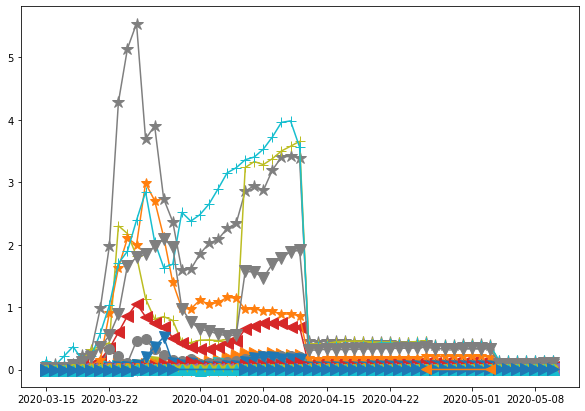

In [31]:
import matplotlib.pyplot as plt
import itertools
fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))
marker = itertools.cycle(('v', 'o', '^','>','<','*','+'))
size= itertools.cycle(tuple(range(10,13)))
# fig.xticks(rotation = 90)
for key, grp in full.groupby(['FIPS']):
    ax2.plot(grp['date'],grp['risk'], label = key, marker = next(marker), linestyle='-',
            markersize = next(size))

In [32]:
full[full.COUNTY=='ESSEX']

,FIPS,date,confirmed_cases,confirmed_cases_smooth,num_visits_movavg_14,num_visitors_nmlz_movavg_14,risk,risk_density_weighted,risk_moving_avg,risk_moving_avg_density_weighted,COUNTY,STATE,num_hospital,num_beds,cum_deaths_count,cum_recovered_count,Population Density
4,34013,2020-03-15,7,8,329.500000,3.033359,0.000208,0.001816,0.000208,0.001816,ESSEX,NJ,13.0,3048.0,NaN,NaN,6330.520561
31,36031,2020-03-15,0,1,134.125000,2.531698,0.000019,0.000144,0.000019,0.000144,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
83,34013,2020-03-16,20,21,321.375000,3.027195,0.000207,0.001815,0.000208,0.001816,ESSEX,NJ,13.0,3048.0,NaN,NaN,6330.520561
110,36031,2020-03-16,0,1,325.625000,6.551324,0.000000,0.000000,0.000000,0.000000,ESSEX,NY,3.0,-959.0,0.0,0.0,20.557565
162,34013,2020-03-17,32,33,315.055556,3.022400,0.001557,0.013627,0.001560,0.013650,ESSEX,NJ,13.0,3048.0,NaN,NaN,6330.520561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,36031,2020-05-08,31,32,146.400000,5.479740,0.001260,0.004891,0.005642,0.019015,ESSEX,NY,3.0,-959.0,0.0,8.0,20.557565
4334,34013,2020-05-09,15544,15545,78.816327,1.684394,0.004163,0.036132,0.035559,0.310716,ESSEX,NJ,13.0,3048.0,NaN,NaN,6330.520561
4361,36031,2020-05-09,31,32,134.800000,4.946267,0.001324,0.005106,0.005438,0.018350,ESSEX,NY,3.0,-959.0,0.0,8.0,20.557565
4413,34013,2020-05-10,15646,15647,63.500000,1.309190,0.004182,0.036298,0.027621,0.241121,ESSEX,NJ,13.0,3048.0,NaN,NaN,6330.520561


In [33]:
max(full.date)

Timestamp('2020-05-10 00:00:00')